# Lecture 34: Iterative Local Search

---

## Overview

As the name suggests, the Iterative Local Search algorithm repeatedly deploys local search heuristics until convergence. In each such iteration, the algorithm transforms the current solution – s, to generate a new solution – s', in its neighbourhood – N. The algorithm then performs a local search on this new solution using one of the local search heuristics – $\text{LS}$, such as the Hill Climb, Tabu Search, Threshold Accepting, Simulated Annealing, etc, given search parameters – χ. The Iterative Local Search algorithm then updates the current and best solution based on quality of the resulting new solution, determined by the objective function value – f. Finally, upon convergence, determined by a threshold level of solution quality or computation effort, the algorithm returns the best solution.

The Iterative Local Search algorithm effectively balances exploration and exploitation. In particular, it ensures solution landscape exploration (diversification) through the neighbourhood transformations that render new random solutions to escape local optima traps. On the other hand, the algorithm ensures solution landscape exploitation (intensification) through the local search heuristics that refine solutions to reach local optima. Hence, the algorithm necessitates deliberate development contextual to the problem at hand with suitable neighbourhood structure, appropriate local search procedure, and sophisticated parameter tuning. Thus, the literature has sparsely deployed Iterative Local Search algorithm for optimisation in the context of ITS; some examples include vehicle navigation, vehicle routing, and traffic signal optimisation.

---

## Pseudo Code

1. **Procedure** $\text{ILS}(s_o, (\text{LS}, N, \chi))$
2. $s ← s_o$ &emsp;<small>// initialise current solution $s$ as the initial solution $s_o$</small>
3. $s^* ← s$ &emsp;<small>// initialise best solution $s^*$ as the current solution</small>
4. **while** $!\text{converged}$ **do** &emsp;<small>// repeat until converged</small>
5. &emsp;$s' {R \atop ←} N(s)$ &emsp;<small>// generate new random solution from neighborhood $N$ of the current solution</small>
6. &emsp;$s' ← \text{LS}(s', (N, \chi))$ &emsp;<small>// perform local search $\text{LS}$ on the new solution given search parameters $\chi$</small>
7. &emsp;**if** $f(s') < f(s)$ **then** &emsp;<small>// if the new solution is better than the current solution</small>
8. &emsp;&emsp;$s ← s'$ &emsp;<small>// update the current solution to the new solution</small>
9. &emsp;**end if**
10. &emsp;**if** $f(s) < f(s^*)$ **then** &emsp;<small>// if the current solution is better than the best solution</small>
11. &emsp;&emsp;$s^* ← s$ &emsp;<small>// update the best solution to the current solution</small>
12. &emsp;**end if**
13. **end while**
14. **return** $s^*$ &emsp;<small>// return the best solution</small>

---

## Implementation

In [98]:
import copy
import random
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def ils(s_o, ls, N, X, n=100, t=1e-5):
    """
    Iterative Local Search (ILS) Algorithm

    Parameters:
    - s_o: Initial solution
    - ls: Local search function
    - N: Neighborhood function
    - X: Parameters for local search
    - n: Maximum number of iterations
    - t: Convergence threshold

    Returns:
    - Best solution found in each iteration
    """
    s   = s_o     # Current solution
    s_b = s       # Best solution found
    S   = [s_b]   # Track best solutions over iterations
    
    i = 1
    e = float('inf')
    converged = False
    while not converged:
        s_n = N(s)                        # Perturbation: generate neighbor
        s_n = ls(s_n, N, X)               # Apply local search

        if f(s_n) < f(s):                 # Accept if better than current
            s = s_n

        if f(s) < f(s_b):                 # Update best solution if improved
            s_b = s

        S.append(s_b)                     # Store best solution at each iteration
    
        i += 1
        if i >= n or e <= t:              # Convergence condition
          converged = True

    return S

---

## Case Study

Here, we have a benchmarked Vehicle Routing Problem instance (E-n51-k5) defined on a directed graph $G=(d,C)$, where $d$ represents depot node, and node set $C$ represents customer nodes. Here, each customer node $c \in C$ has a demand $q_c$ that must be fulfilled from the depot via delivery fleet $V$, wherein each vehicle $v$ has a capacity $q_v$. Given traversal length $d_{ij}$ for arc $(i,j) \in A$, the objective of a Vehicle Routing Problem is to develop routes from the depot node using select vehicles such that every customer node is visited exactly once while minimising the total distance traveled and satisfying all vehicle capacity constraints.

In [137]:
D = [(0, 30, 40, 0)]
C = [
      (1, 37, 52, 7), 
      (2, 49, 49, 30), 
      (3, 52, 64, 16), 
      (4, 20, 26, 9), 
      (5, 40, 30, 21), 
      (6, 21, 47, 15), 
      (7, 17, 63, 19), 
      (8, 31, 62, 23), 
      (9, 52, 33, 11), 
      (10, 51, 21, 5), 
      (11, 42, 41, 19), 
      (12, 31, 32, 29), 
      (13, 5, 25, 23), 
      (14, 12, 42, 21), 
      (15, 36, 16, 10), 
      (16, 52, 41, 15), 
      (17, 27, 23, 3), 
      (18, 17, 33, 41), 
      (19, 13, 13, 9), 
      (20, 57, 58, 28), 
      (21, 62, 42, 8), 
      (22, 42, 57, 8), 
      (23, 16, 57, 16), 
      (24, 8, 52, 10), 
      (25, 7, 38, 28), 
      (26, 27, 68, 7), 
      (27, 30, 48, 15), 
      (28, 43, 67, 14), 
      (29, 58, 48, 6), 
      (30, 58, 27, 19), 
      (31, 37, 69, 11), 
      (32, 38, 46, 12), 
      (33, 46, 10, 23), 
      (34, 61, 33, 26), 
      (35, 62, 63, 17), 
      (36, 63, 69, 6), 
      (37, 32, 22, 9), 
      (38, 45, 35, 15), 
      (39, 59, 15, 14), 
      (40, 5, 6, 7), 
      (41, 10, 17, 27), 
      (42, 21, 10, 13), 
      (43, 5, 64, 11), 
      (44, 30, 15, 16), 
      (45, 39, 10, 10), 
      (46, 32, 39, 5), 
      (47, 25, 32, 25), 
      (48, 25, 55, 17), 
      (49, 48, 28, 18), 
      (50, 56, 37, 10)
]
V = [
      (1, 160),
      (2, 160),
      (3, 160),
      (4, 160),
      (5, 160)
]

In [ ]:
# Compute total cost
def f(s):
    z = 0
    d = D[0]

    for k, R in enumerate(s):
        if not R:
            continue
        
        # Distance
        n  = C[R[0]]
        z += np.sqrt((d[1] - n[1])**2 + (d[2] - n[2])**2)
        for i in range(len(R)-1):
            m  = C[R[i+1]]
            z += np.sqrt((n[1] - m[1])**2 + (n[2] - m[2])**2)
            n  = m
        z += np.sqrt((n[1] - d[1])**2 + (n[2] - d[2])**2)

        # Penalty
        v   = V[k]
        q_v = v[1]
        w   = sum(C[i][3] for i in s[k])
        p   = max(0, w-q_v)
        z  +=  100 * p

    return z

# Move  
def N1(s):
    s_n = copy.deepcopy(s)

    i, j = random.sample(range(len(V)), 2)
    k = random.randint(0, len(s_n[i])-1)
    
    c = s_n[i][k]
    del s_n[i][k]

    k = random.randint(0, len(s_n[j]))
    s_n[j].insert(k, c)

    return s_n

# Swap
def N2(s):
    s_n = copy.deepcopy(s)

    i, j = random.sample(range(len(V)), 2)
    
    if not s_n[i]:
        return s_n
    if not s_n[j]:
        return s_n
    
    a = random.randint(0, len(s_n[i])-1)
    b = random.randint(0, len(s_n[j])-1)

    s_n[i][a], s_n[j][b] = s_n[j][b], s_n[i][a]

    return s_n

# 2-opt
def N3(s):
    s_n = copy.deepcopy(s)
    
    i = random.choice([k for k, R in enumerate(s_n) if len(R) >= 4])
    
    R = s_n[i]
    a, b = sorted(random.sample(range(len(R)), 2))
    R[a:b+1] = reversed(R[a:b+1])
    s_n[i] = R
    
    return s_n

# Local Search
def ls(s, N, X):
    for _ in range(X.get("n", 50)):
        s_n = N(s)
        if f(s_n) < f(s):
            s = s_n
    return s

# Visualise
def viz(s):
    d = D[0]

    plt.scatter(d[1], d[2], c='indianred', marker='s', s=100, label='Depot')

    for i, R in enumerate(s):
        if R:
            x = [C[j][1] for j in R]
            y = [C[j][2] for j in R]
            plt.plot(x, y, label=f'Vehicle {i+1}', linewidth=1)
            plt.scatter([C[k][1] for k in R], [C[k][2] for k in R], s=40, color='grey')

    plt.legend()
    plt.title("VRP Solution")
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.grid(True)
    plt.show()

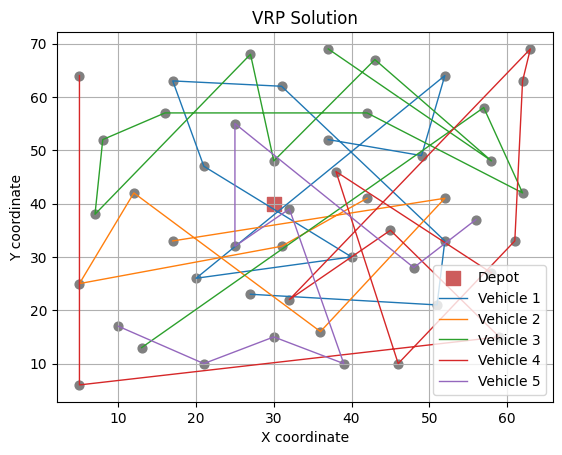

In [205]:
# Initial solution
d   = D[0]
s_o = [[] for v in V]
for i, c in enumerate(C):
    q_c = c[3]
    for j, v in enumerate(V):
        q_v = v[1]
        w   = sum(C[k][3] for k in s_o[j])
        if w + q_c <= q_v:
            s_o[j].append(i)
            break

viz(s_o)

Best solution: [[45, 1, 8, 48, 9, 4, 7, 25, 6, 42], [11, 29, 33, 15, 37, 16, 12, 36, 14], [5, 22, 23, 24, 26, 0, 2, 34, 35, 19], [43, 32, 38, 44, 46, 17, 31, 10], [3, 18, 40, 39, 41, 13, 47, 27, 30, 21, 28, 20, 49]]
Objective function value: 861.9154302435206


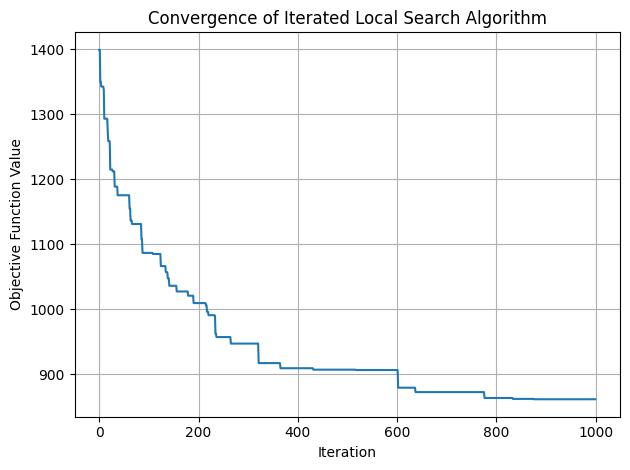

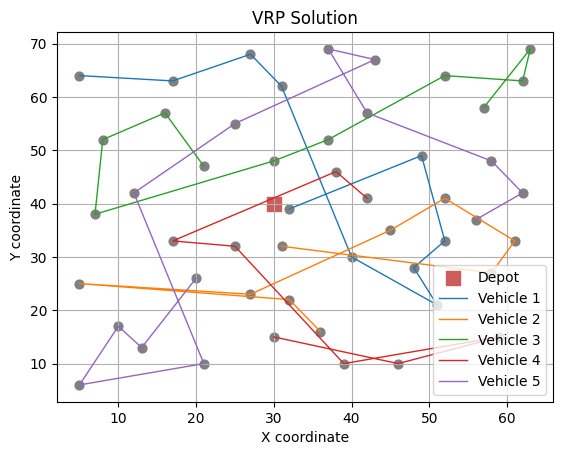

In [219]:
# N1 neighbourhood
N   = N1
X   = {"n": 100}
S   = ils(s_o, ls, N, X, n=1000, t=1e-5)
s_b = S[-1]
F   = [f(s) for s in S]

# Report outcome
print("Best solution:", s_b)
print("Objective function value:", f(s_b))

# Convergence plot
fig = plt.figure()
plt.plot(F)
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Iterated Local Search Algorithm")
plt.grid()
plt.tight_layout()
plt.show()

# Visualise the solution
viz(s_b)

Best solution: [[28, 19, 35, 21, 30, 27, 20, 15, 1, 10, 37], [22, 23, 24, 12, 39, 40, 17], [18, 41, 16, 3, 13, 42, 6, 25, 7, 34, 2, 31], [46, 9, 32, 44, 36, 0, 47, 26, 5, 43, 14], [45, 4, 48, 33, 29, 38, 49, 8, 11]]
Objective function value: 815.2678930769745


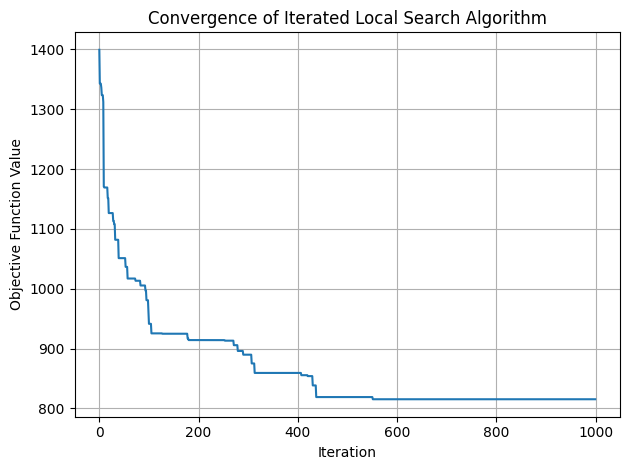

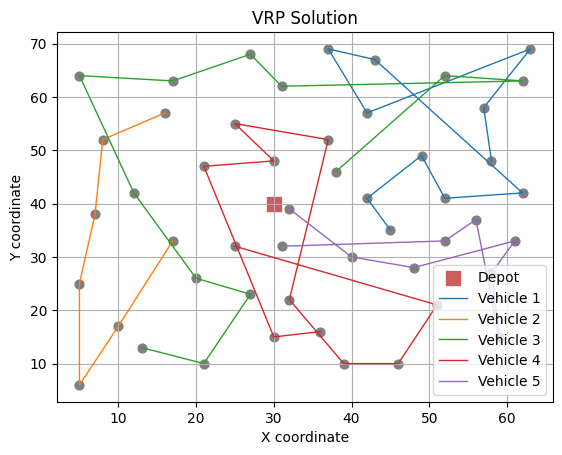

In [220]:
# N2 neighbourhood
N   = N2
X   = {"n": 100}
S   = ils(s_o, ls, N, X, n=1000, t=1e-5)
s_b = S[-1]
F   = [f(s) for s in S]

# Report outcome
print("Best solution:", s_b)
print("Objective function value:", f(s_b))

# Convergence plot
fig = plt.figure()
plt.plot(F)
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Iterated Local Search Algorithm")
plt.grid()
plt.tight_layout()
plt.show()

# Visualise the solution
viz(s_b)

Best solution: [[5, 6, 7, 0, 2, 1, 8, 9, 4, 16, 3], [10, 15, 14, 11, 17, 12, 13], [18, 24, 23, 22, 25, 30, 27, 19, 28, 20, 21, 26], [31, 37, 36, 39, 32, 38, 29, 33, 34, 35, 42], [47, 49, 48, 44, 43, 41, 40, 46, 45]]
Objective function value: 925.0306345706556


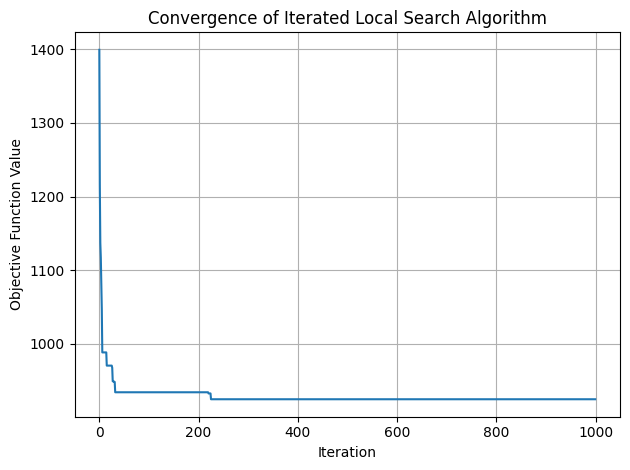

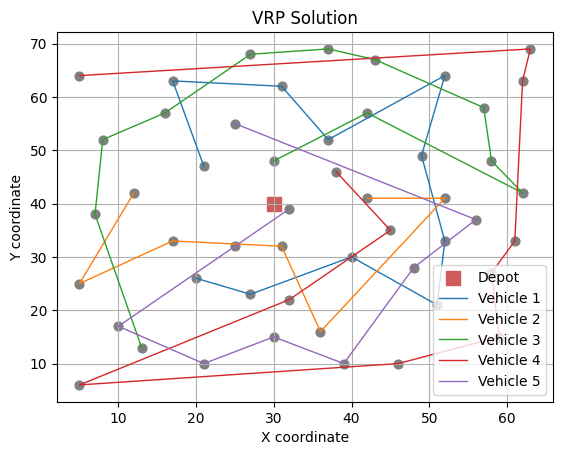

In [221]:
# N3 neighbourhood
N   = N3
X   = {"n": 100}
S   = ils(s_o, ls, N, X, n=1000, t=1e-5)
s_b = S[-1]
F   = [f(s) for s in S]

# Report outcome
print("Best solution:", s_b)
print("Objective function value:", f(s_b))

# Convergence plot
fig = plt.figure()
plt.plot(F)
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Iterated Local Search Algorithm")
plt.grid()
plt.tight_layout()
plt.show()

# Visualise the solution
viz(s_b)